In [5]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
#generate the sample
def gen_data():
    N = 3000
    beta = 3
    x = np.random.normal(loc=-.5, scale=.5, size=N)
    e = np.random.normal(loc=0.0, scale=1.0, size=N)
    y = 1*(1 + beta * x + e >= 0) 
    return y,x,N

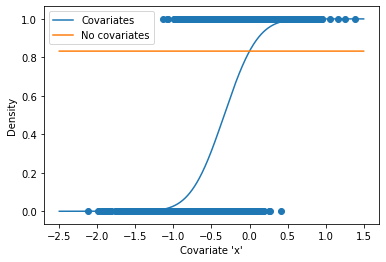

In [7]:
yn,xn, N = gen_data()
support = np.arange(-2.5,1.5,1/N)
model1 = sm.Probit(yn,sm.add_constant(xn))
model1 = model1.fit(disp=False)
model1_fit =  norm.cdf(model1.params[0] + model1.params[1]*support)

model2 = sm.Probit(yn,np.ones(len(xn)))
model2 = model2.fit(disp=False)
logit = lambda x: np.exp(x)/(1+np.exp(x))
model2_fit =  norm.cdf(model1.params[0]+ 0 * support)

plt.scatter(xn,yn)
plt.plot(support,model1_fit,label="Covariates")
plt.plot(support,model2_fit,label="No covariates")
plt.legend()
plt.ylabel("Density")
plt.xlabel("Covariate 'x'")
plt.savefig('figs/cov_fit')
plt.show()

In [8]:
#visualize the guassian process
def gen_llr():
    y,x,N = gen_data()
    ll1 = []
    ll2 = []
    rescale = []
    n0 = 250
    skip = 250

    for n in range(n0,N,skip):
        xn = x[1:n+1]
        yn = y[1:n+1]
    
        model1 = sm.Probit(yn,sm.add_constant(xn))
        model1 = model1.fit(disp=False)
        pr1 = yn*(yn - model1.resid_response) + (1-yn)*(1- (yn - model1.resid_response))
        ll1.append( np.log(pr1).sum() )
                       
                       
        model2 = sm.Probit(yn,np.ones(len(xn)))
        model2 = model2.fit(disp=False)
        pr2 = yn*(yn - model2.resid_response) + (1-yn)*(1- (yn - model2.resid_response))
        ll2.append( np.log(pr2).sum() )
       
        rescale.append( ( (np.log(pr1) - np.log(pr2))**2 ).mean() )
    return ll1, ll2, rescale, n0, N, skip


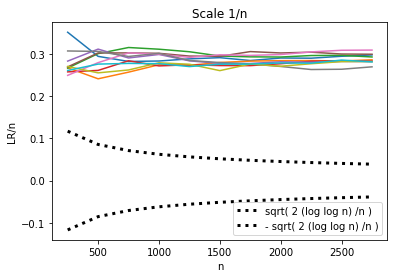

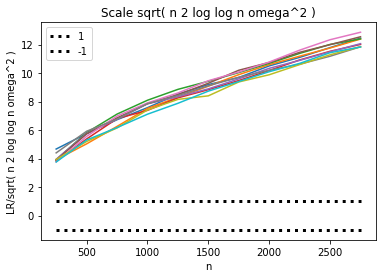

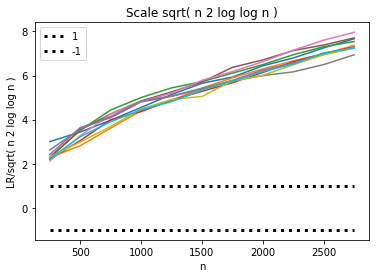

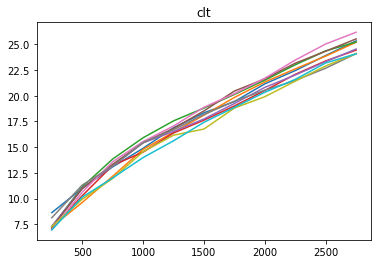

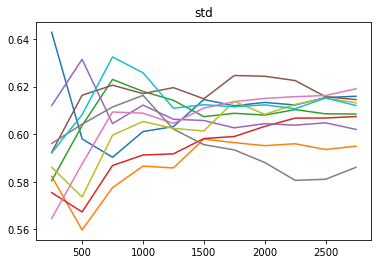

In [11]:
for i in range(10):
    ll1, ll2, rescale, n0, N, skip = gen_llr()

    scale = np.arange(n0,N,skip)
    process =  (np.array(ll1) - np.array(ll2))
    std_process = np.sqrt(np.array(rescale))
    
    #scale by 1/n
    plt.figure(1)
    plt.plot(scale, process/scale )

    #scale by lil and var
    plt.figure(2)
    plt.plot(scale,  (process/scale)/ ( np.sqrt( 2*np.log(np.log(scale))/scale )*std_process ) )
    
    
    #scale by lil 
    plt.figure(3)
    plt.plot(scale,  (process/scale)/ ( np.sqrt( 2*np.log(np.log(scale))/scale ) ) )

    #scale by root n
    plt.figure(4)
    plt.title("clt")
    plt.plot(scale, np.sqrt(scale) * (process/scale)/std_process )
    
    plt.figure(5)
    plt.title("std")
    plt.plot(scale, std_process)
    

#plot 1
plt.figure(1)
plt.title("Scale 1/n")
plt.ylabel("LR/n")
plt.xlabel("n")

plt.plot(scale,np.sqrt(2*np.log(np.log(scale))/scale),  color='black', linewidth=3, linestyle=":",
         label="sqrt( 2 (log log n) /n )" )
plt.plot(scale,-1*np.sqrt(2*np.log(np.log(scale))/scale),  color='black', linewidth=3, linestyle=":",
        label="- sqrt( 2 (log log n) /n )")
plt.legend()
plt.savefig("figs/lln_cov")

#plot 2
plt.figure(2)
plt.title("Scale sqrt( n 2 log log n omega^2 )")
plt.ylabel("LR/sqrt( n 2 log log n omega^2 )")
plt.xlabel("n")

plt.plot(scale,np.ones(scale.shape[0]),  color='black', linewidth=3, linestyle=":",  label="1" )
plt.plot(scale,-1*np.ones(scale.shape[0]),  color='black', linewidth=3, linestyle=":", label="-1")
plt.legend()
plt.savefig("figs/lil_cov_scale")


#plot 3
plt.figure(3)
plt.title("Scale sqrt( n 2 log log n )")
plt.ylabel("LR/sqrt( n 2 log log n )")
plt.xlabel("n")

plt.plot(scale,np.ones(scale.shape[0]),  color='black', linewidth=3, linestyle=":",  label="1" )
plt.plot(scale,-1*np.ones(scale.shape[0]),  color='black', linewidth=3, linestyle=":", label="-1")
plt.legend()
plt.savefig("figs/lil_cov_noscale")


plt.show()

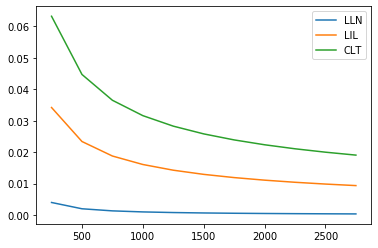

In [10]:
#scale by 1/n
plt.plot(scale,1/scale,label="LLN")

#scale by root
plt.plot(scale, 1/ np.sqrt(2*scale*np.log(np.log(scale))), label="LIL")

#scale by root n
plt.plot(scale, 1/np.sqrt(scale),label="CLT")

plt.legend()
plt.show()